In [1]:
from frechetMeanGraph_variable_q import *

from matplotlib import pyplot as plt
plt.style.use(['classic','ggplot'])
from matplotlib import ticker

import pandas as pd

/Users/oliviacourtney/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/oliviacourtney/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
/var/folders/59/fdfj046x7rd5r9hl09tnqvxh0000gn/T/ipykernel_21912/3048940865.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466

# Using primary school contact patern data set, records over two days (from 8:40am-5:20pm) during 20 second intervals.
http://www.sociopatterns.org/datasets/primary-school-temporal-network-data/


In [2]:
#Load data
full_data = pd.read_csv('primaryschool.csv',sep='\t',header=None)
full_data.columns = ['Time','i','j','Class i','Class j'] # person i and person j in corresponding classes

# get metadata about each person
metadata = pd.read_csv('metadata_primaryschool.txt',sep='\t',header=None)
metadata.columns = ['ID','Class','Gender']

In [3]:
full_data[full_data['Time']>=62300]

,Time,i,j,Class i,Class j
60611,62300,1539,1705,4A,4A
60612,62300,1545,1837,4A,4A
60613,62300,1558,1685,3B,3B
60614,62300,1560,1580,3B,3B
60615,62300,1702,1889,2B,2B
...,...,...,...,...,...
125768,148120,1752,1783,1A,1A
125769,148120,1752,1789,1A,1A
125770,148120,1775,1798,1A,1A
125771,148120,1783,1796,1A,1A


### Generate graphs from data

In [4]:
# Looking only at the first day, between 12:00am-12:40pm. 
data1 = full_data[(full_data['Time'] >= 43200) & (full_data['Time'] <= 45600)]
# Looking only at the first day, between 12:40am-13:20pm.
data2 = full_data[(full_data['Time'] >= 45600) & (full_data['Time'] <= 48000)]

# Looking at the second day, same times.
data11 = full_data[(full_data['Time'] >= 129600) & (full_data['Time'] <= 132000)]
data22 = full_data[(full_data['Time'] >= 131400) & (full_data['Time'] <= 134400)]

# split the data in half
graphs1 = []
graphs2 = []
graphs11 = []
graphs22 = []

n_bins1 = 10 #group by 4 min intervals
bins = pd.cut(data1['Time'],bins=n_bins1,labels=np.arange(n_bins1))

for group, df in data1.groupby(bins):
    G = nx.Graph()
    G.add_nodes_from(metadata['ID'])
    G.add_edges_from(zip(df['i'],df['j']))
    graphs1.append(nx.to_numpy_array(G))

bins = pd.cut(data11['Time'],bins=n_bins1,labels=np.arange(n_bins1))

for group, df in data11.groupby(bins):
    G = nx.Graph()
    G.add_nodes_from(metadata['ID'])
    G.add_edges_from(zip(df['i'],df['j']))
    graphs11.append(nx.to_numpy_array(G))

n_bins2 = 10 # group by 4 min intervals
bins = pd.cut(data2['Time'],bins=n_bins2,labels=np.arange(n_bins2))

for group, df in data2.groupby(bins):
    G = nx.Graph()
    G.add_nodes_from(metadata['ID'])
    G.add_edges_from(zip(df['i'],df['j']))
    graphs2.append(nx.to_numpy_array(G))

bins = pd.cut(data22['Time'],bins=n_bins2,labels=np.arange(n_bins2))

for group, df in data22.groupby(bins):
    G = nx.Graph()
    G.add_nodes_from(metadata['ID'])
    G.add_edges_from(zip(df['i'],df['j']))
    graphs22.append(nx.to_numpy_array(G))

# compose graphs from day 1 and day 2
graphs_cum1 = [nx.to_numpy_array(nx.compose(nx.from_numpy_array(graphs1[i]), nx.from_numpy_array(graphs11[i]))) for i in range(n_bins1)]
graphs_cum2 = [nx.to_numpy_array(nx.compose(nx.from_numpy_array(graphs2[i]), nx.from_numpy_array(graphs22[i]))) for i in range(n_bins2)]

/var/folders/59/fdfj046x7rd5r9hl09tnqvxh0000gn/T/ipykernel_21912/3906828554.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group, df in data1.groupby(bins):
/var/folders/59/fdfj046x7rd5r9hl09tnqvxh0000gn/T/ipykernel_21912/3906828554.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group, df in data11.groupby(bins):
/var/folders/59/fdfj046x7rd5r9hl09tnqvxh0000gn/T/ipykernel_21912/3906828554.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the fut

In [5]:
connects_cum1 = [check_connect(graphs_cum1[i])[1] for i in range(n_bins1)]
connects_cum2 = [check_connect(graphs_cum2[i])[1] for i in range(n_bins2)]
np.mean(connects_cum1), np.mean(connects_cum2)

(1.0, 1.3)

In [6]:
sample1 = GraphEnsemble(n = 242, N = n_bins1, dP = 2)
sample1.fill_graphs_data(graphs1)
sample1.fill_eigs()

sample2 = GraphEnsemble(n = 242, N = n_bins2, dP = 2)
sample2.fill_graphs_data(graphs2)
sample2.fill_eigs()

sample_cum1 = GraphEnsemble(n = 242, N = n_bins1, dP = 2)
sample_cum1.fill_graphs_data(graphs_cum1)
sample_cum1.fill_eigs()

sample_cum2 = GraphEnsemble(n = 242, N = n_bins2, dP = 2)
sample_cum2.fill_graphs_data(graphs_cum2)
sample_cum2.fill_eigs()

/Users/oliviacourtney/frechet/frechet_private/DatasetExps/ExperimentFuncs_withq.py:55: ComplexWarning: Casting complex values to real discards the imaginary part
  self.eigs[i,:] = spla.eigs(self.graphs[i], k = self.k, which = 'LR', return_eigenvectors=False)


## Running algorithm

In [7]:
start_val = [0.2,0.14,0.03]
val1, frechetval_history1, frechetgrad_history1 = grad_descent(frechet_func, start_val, sample = sample_cum1, 
                                                               dx = 0.0001, learn_rate = 0.002, tol = 1e-7, nmax=100)

In [8]:
len(frechetval_history1), frechet_func(val1, sample_cum1)

(34, 0.08363999913894245)

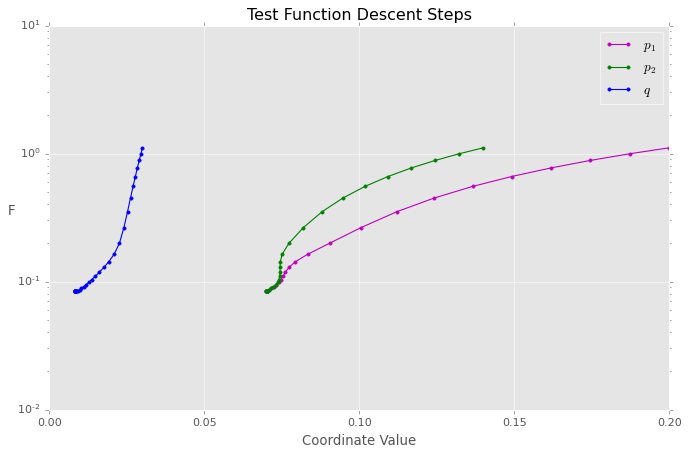

In [9]:
plt.figure(figsize=(10,6))
plt.yscale("log")
path1 = []
path2 = []
pathq = []
for i in range(len(frechetval_history1)):
    path1.append((frechetval_history1[i][0][0], frechetval_history1[i][1]))
    path2.append((frechetval_history1[i][0][1], frechetval_history1[i][1]))
    pathq.append((frechetval_history1[i][0][2], frechetval_history1[i][1]))

plt.plot([path1[i][0] for i in range(len(path1))], [path1[j][1] for j in range(len(path1))], '.m-')
plt.plot([path2[i][0] for i in range(len(path2))], [path2[j][1] for j in range(len(path2))], '.g-')
plt.plot([pathq[i][0] for i in range(len(pathq))], [pathq[j][1] for j in range(len(pathq))], '.b-')


plt.xlabel('Coordinate Value')
plt.ylabel('F', rotation=0)
plt.title('Test Function Descent Steps')
plt.legend(['$p_1$ ', '$p_2$', '$q$'])
plt.show()

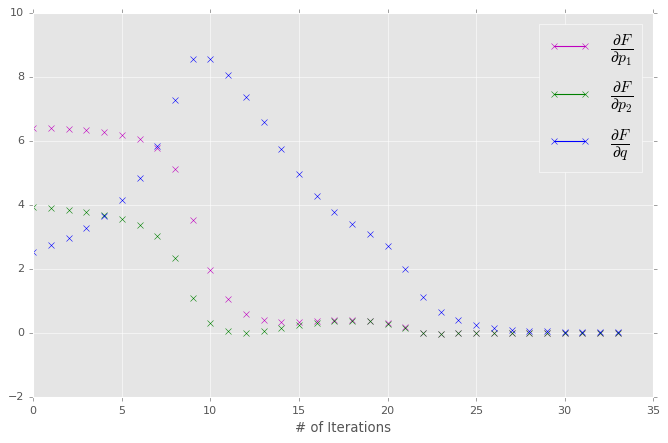

In [10]:
plt.figure(figsize=(10,6))
#plt.yscale("log")
for i in range(len(frechetgrad_history1)):
    plt.plot(i,(frechetgrad_history1[i][0]), marker = 'x', color = 'm')
    plt.plot(i,(frechetgrad_history1[i][1]), marker = 'x', color = 'g')
    plt.plot(i,(frechetgrad_history1[i][2]), marker = 'x', color = 'b')

plt.xlabel('# of Iterations')
#plt.title('Gradient vs Iterations')
plt.legend([r'$\frac{\partial F}{\partial p_1}$', r'$\frac{\partial F}{\partial p_2}$', r'$\frac{\partial F}{\partial q}$'], prop={'size': 20})
#plt.savefig('PSgradient_first.pdf',bbox_inches='tight')
plt.show()

In [11]:
r = 20
ax1 = np.linspace(0,0.2, r)
ax2 = np.linspace(0,0.15, r)
axq = np.linspace(0,0.03, r)

grid1 = np.zeros([r,r,r])

for i in range(r):
    for j in range(r):
        for ki in range(r):
            grid1[i,j,ki] = frechet_func([ax1[i], ax2[j], axq[ki]], sample_cum1)

/var/folders/59/fdfj046x7rd5r9hl09tnqvxh0000gn/T/ipykernel_21912/2266629489.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(cb, ax=axs[0], format='%.3f')
/var/folders/59/fdfj046x7rd5r9hl09tnqvxh0000gn/T/ipykernel_21912/2266629489.py:22: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(cb, ax=axs[1], format='%.3f')
/var/folders/59/fdfj046x7rd5r9hl09tnqvxh0000gn/T/ipykernel_21912/2266629489.py:32: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(cb, ax=axs[2], format='%.3f')


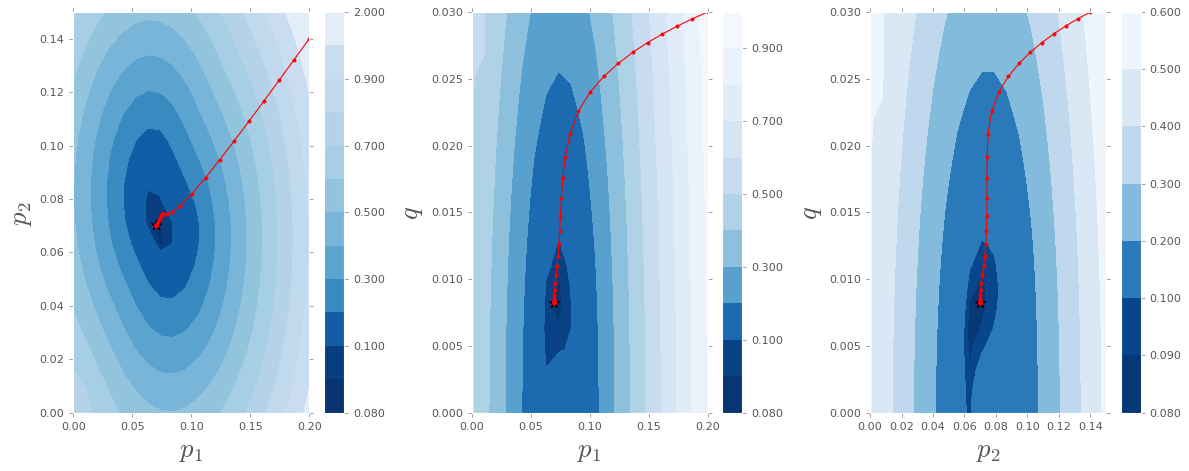

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

X, Y = np.meshgrid(ax1,ax2, indexing='ij')
#cb = axs[0].contourf(X, Y, grid1[:,:,2] ,cmap ='Blues')
cb = axs[0].contourf(X, Y, grid1[:,:,5], locator=ticker.LogLocator(subs = 'all'), cmap='Blues_r')
axs[0].set_xlabel('$p_{1}$', size=24)
axs[0].set_ylabel('$p_{2}$',size = 24)
axs[0].scatter(val1[0],val1[1], label=f'Estimated Min: ({val1[0]:.5f}, {val1[1]:.5f})', marker='*', s=100, color = 'k')
axs[0].plot([frechetval_history1[i][0][0] for i in range(len(frechetval_history1))], 
         [frechetval_history1[j][0][1] for j in range(len(frechetval_history1))], '.r-')

fig.colorbar(cb, ax=axs[0], format='%.3f')

X, Y = np.meshgrid(ax1,axq, indexing='ij')
cb = axs[1].contourf(X, Y, grid1[:,9,:],locator=ticker.LogLocator(subs = 'all'), cmap='Blues_r')
axs[1].set_xlabel('$p_{1}$', size=24)
axs[1].set_ylabel('$q$',size = 24)
axs[1].scatter(val1[0],val1[2], label=f'Estimated Min: ({val1[0]:.5f}, {val1[2]:.5f})', marker='*', s=100, color = 'k')
axs[1].plot([frechetval_history1[i][0][0] for i in range(len(frechetval_history1))], 
         [frechetval_history1[j][0][2] for j in range(len(frechetval_history1))], '.r-')

fig.colorbar(cb, ax=axs[1], format='%.3f')

X, Y = np.meshgrid(ax2,axq, indexing='ij')
cb = axs[2].contourf(X, Y, grid1[7,:,:],locator=ticker.LogLocator(subs = 'all'), cmap='Blues_r')
axs[2].set_xlabel('$p_{2}$', size=24)
axs[2].set_ylabel('$q$',size = 24)
axs[2].scatter(val1[1],val1[2], label=f'Estimated Min: ({val1[1]:.5f}, {val1[2]:.5f})', marker='*', s=100, color = 'k')
axs[2].plot([frechetval_history1[i][0][1] for i in range(len(frechetval_history1))], 
         [frechetval_history1[j][0][2] for j in range(len(frechetval_history1))], '.r-')

fig.colorbar(cb, ax=axs[2], format='%.3f')
fig.tight_layout()

#plt.savefig('PSmap_first.pdf')
plt.show()

# sample 2

In [13]:
val2, frechetval_history2, frechetgrad_history2 = grad_descent(frechet_func, start_val, sample = sample_cum2, 
                                                               dx = 0.0002, learn_rate = 0.0008, tol = 1e-6, nmax=120)

In [14]:
len(frechetval_history2), frechet_func(val2, sample_cum2)

(92, 0.07119524433970523)

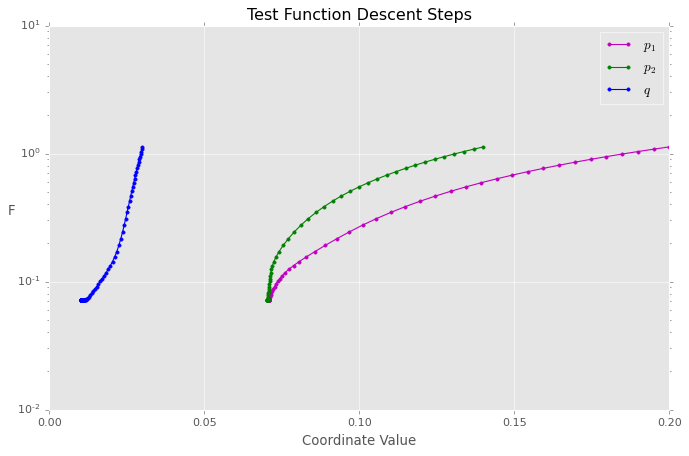

In [15]:
plt.figure(figsize=(10,6))
plt.yscale("log")
path1 = []
path2 = []
pathq = []
for i in range(len(frechetval_history2)):
    path1.append((frechetval_history2[i][0][0], frechetval_history2[i][1]))
    path2.append((frechetval_history2[i][0][1], frechetval_history2[i][1]))
    pathq.append((frechetval_history2[i][0][2], frechetval_history2[i][1]))

plt.plot([path1[i][0] for i in range(len(path1))], [path1[j][1] for j in range(len(path1))], '.m-')
plt.plot([path2[i][0] for i in range(len(path2))], [path2[j][1] for j in range(len(path2))], '.g-')
plt.plot([pathq[i][0] for i in range(len(pathq))], [pathq[j][1] for j in range(len(pathq))], '.b-')


plt.xlabel('Coordinate Value')
plt.ylabel('F', rotation=0)
plt.title('Test Function Descent Steps')
plt.legend(['$p_1$ ', '$p_2$', '$q$'])
plt.show()

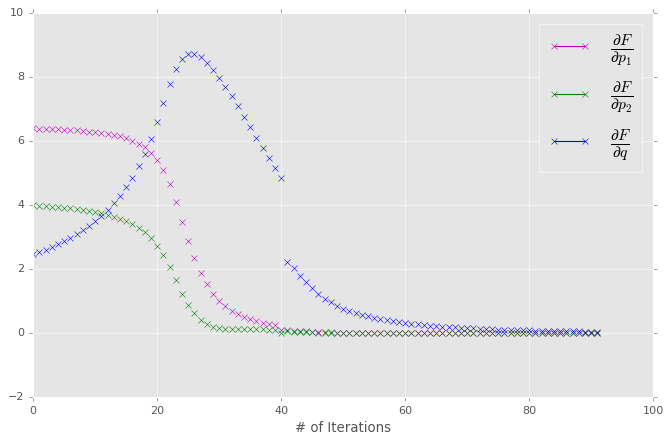

In [16]:
plt.figure(figsize=(10,6))
#plt.yscale("log")
for i in range(len(frechetgrad_history2)):
    plt.plot(i,(frechetgrad_history2[i][0]), marker = 'x', color = 'm')
    plt.plot(i,(frechetgrad_history2[i][1]), marker = 'x', color = 'g')
    plt.plot(i,(frechetgrad_history2[i][2]), marker = 'x', color = 'b')

plt.xlabel('# of Iterations')
#plt.title('Gradient vs Iterations')
plt.legend([r'$\frac{\partial F}{\partial p_1}$', r'$\frac{\partial F}{\partial p_2}$', r'$\frac{\partial F}{\partial q}$'], prop={'size': 20})
#plt.savefig('PSgradient_second.pdf',bbox_inches='tight')
plt.show()

In [17]:
r = 20
ax1 = np.linspace(0,0.2, r)
ax2 = np.linspace(0,0.15, r)
axq = np.linspace(0,0.03, r)


grid2 = np.zeros([r,r,r])

for i in range(r):
    for j in range(r):
        for ki in range(r):
            grid2[i,j,ki] = frechet_func([ax1[i], ax2[j], axq[ki]],sample_cum2)

/var/folders/59/fdfj046x7rd5r9hl09tnqvxh0000gn/T/ipykernel_21912/963124679.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(cb, ax=axs[0], format='%.3f')
/var/folders/59/fdfj046x7rd5r9hl09tnqvxh0000gn/T/ipykernel_21912/963124679.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(cb, ax=axs[1], format='%.3f')
/var/folders/59/fdfj046x7rd5r9hl09tnqvxh0000gn/T/ipykernel_21912/963124679.py:31: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(cb, ax=axs[2], format='%.3f')


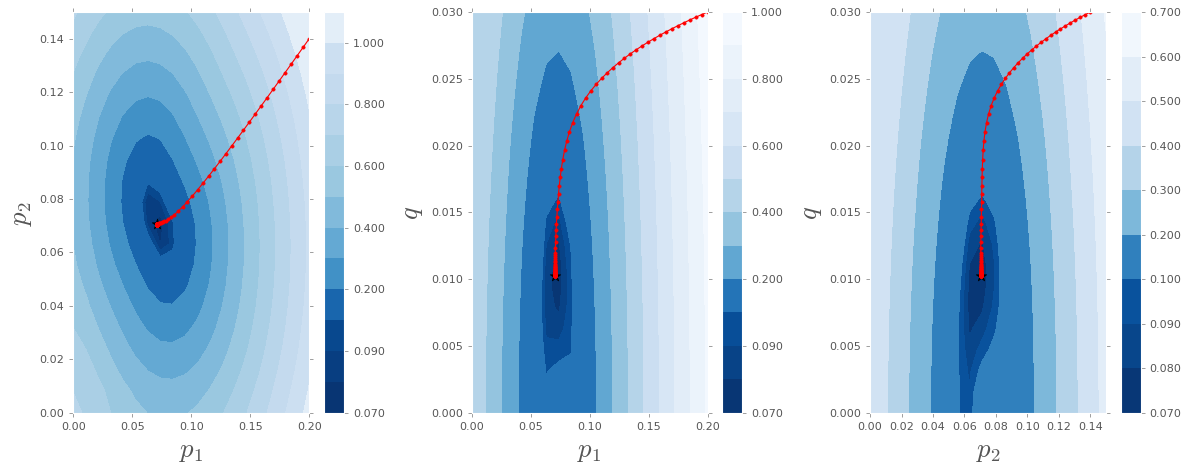

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

X, Y = np.meshgrid(ax1,ax2, indexing='ij')
cb = axs[0].contourf(X, Y, grid2[:,:,7],locator=ticker.LogLocator(subs = 'all'), cmap='Blues_r')
axs[0].set_xlabel('$p_{1}$', size=24)
axs[0].set_ylabel('$p_{2}$',size = 24)
axs[0].scatter(val2[0],val2[1], label=f'Estimated Min: ({val2[0]:.5f}, {val2[1]:.5f})', marker='*', s=100, color = 'k')
axs[0].plot([frechetval_history2[i][0][0] for i in range(len(frechetval_history2))], 
         [frechetval_history2[j][0][1] for j in range(len(frechetval_history2))], '.r-')

fig.colorbar(cb, ax=axs[0], format='%.3f')

X, Y = np.meshgrid(ax1,axq, indexing='ij')
cb = axs[1].contourf(X, Y, grid2[:,9,:],locator=ticker.LogLocator(subs = 'all'), cmap='Blues_r')
axs[1].set_xlabel('$p_{1}$', size=24)
axs[1].set_ylabel('$q$',size = 24)
axs[1].scatter(val2[0],val2[2], label=f'Estimated Min: ({val2[0]:.5f}, {val2[2]:.5f})', marker='*', s=100, color = 'k')
axs[1].plot([frechetval_history2[i][0][0] for i in range(len(frechetval_history2))], 
         [frechetval_history2[j][0][2] for j in range(len(frechetval_history2))], '.r-')

fig.colorbar(cb, ax=axs[1], format='%.3f')

X, Y = np.meshgrid(ax2,axq, indexing='ij')
cb = axs[2].contourf(X, Y, grid2[7,:,:],locator=ticker.LogLocator(subs = 'all'), cmap='Blues_r')
axs[2].set_xlabel('$p_{2}$', size=24)
axs[2].set_ylabel('$q$',size = 24)
axs[2].scatter(val2[1],val2[2], label=f'Estimated Min: ({val2[1]:.5f}, {val2[2]:.5f})', marker='*', s=100, color = 'k')
axs[2].plot([frechetval_history2[i][0][1] for i in range(len(frechetval_history2))], 
         [frechetval_history2[j][0][2] for j in range(len(frechetval_history2))], '.r-')

fig.colorbar(cb, ax=axs[2], format='%.3f')

fig.tight_layout()
#plt.savefig('PSmap_second.pdf')
plt.show()

In [19]:
val1,val2

([0.07016624299393909, 0.07012928917363967, 0.008219952986237816],
 [0.07068883389192737, 0.07045974482547016, 0.010230815852865754])